In [5]:
# Impression Id , session Id- What it is

In [4]:
# EDA Articles -> per Dataset and validation
# EDA Behaviors -> per Dataset and validation
# EDA History -> per Dataset and validation
# --------------------------------------------------------------------------
## DateTime -> insights , count list , inview ,scroll percentage , read time.
# -------------------------------------------------------------
## History prior to Behaviours

# History -21 days range. Start-end period- 
# Behaviours - 7 days data

## Id - Demo-Val - Small large - Users exist or not in Val Vs Train also for articles

#### Load libraries and datasets

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Load the dataset-Dynamicaly
size = 'large'
type_ = 'train'

articles_path = f"./files/parquet/ebnerd_{size}/articles.parquet"
behaviors_path = f"./files/parquet/ebnerd_{size}/{type_}/behaviors.parquet"
history_path = f"./files/parquet/ebnerd_{size}/{type_}/history.parquet"

df_articles = pd.read_parquet(articles_path)
df_behaviors = pd.read_parquet(behaviors_path)
df_history = pd.read_parquet(history_path)

# Only load the train-demo size since it is the smaller one

In [9]:
df_articles['last_modified_time'].min()

Timestamp('2023-06-29 06:20:32')

In [10]:
df_articles['last_modified_time'].max()

Timestamp('2024-01-25 05:15:50')

In [14]:
df_behaviors['impression_time'].min()

Timestamp('2023-05-18 07:00:00')

In [15]:
df_behaviors['impression_time'].max()

Timestamp('2023-05-25 06:59:59')

### Articles

In [3]:
# Create a copy article df
df_articles_clear = df_articles.copy()

In [4]:
df_articles.head(20)

,article_id,title,subtitle,last_modified_time,premium,body,published_time,image_ids,article_type,url,ner_clusters,entity_groups,topics,category,subcategory,category_str,total_inviews,total_pageviews,total_read_time,sentiment_score,sentiment_label
0,3037230,Ishockey-spiller: Jeg troede jeg skulle dø,ISHOCKEY: Ishockey-spilleren Sebastian Harts h...,2023-06-29 06:20:57,False,Ambitionerne om at komme til USA og spille ish...,2003-08-28 08:55:00,None,article_default,https://ekstrabladet.dk/sport/anden_sport/isho...,[],[],"[Kriminalitet, Kendt, Sport, Katastrofe, Mindr...",142,"[327, 334]",sport,NaN,NaN,NaN,0.9752,Negative
1,3044020,Prins Harry tvunget til dna-test,Hoffet tvang Prins Harry til at tage dna-test ...,2023-06-29 06:21:16,False,Den britiske tabloidavis The Sun fortsætter me...,2005-06-29 08:47:00,"[3097307, 3097197, 3104927]",article_default,https://ekstrabladet.dk/underholdning/udlandke...,"[Harry, James Hewitt]","[PER, PER]","[Kriminalitet, Kendt, Underholdning, Personfar...",414,[432],underholdning,NaN,NaN,NaN,0.7084,Negative
2,3057622,Rådden kørsel på blå plader,Kan ikke straffes: Udenlandske diplomater i Da...,2023-06-29 06:21:24,False,Slingrende spritkørsel. Grove overtrædelser af...,2005-10-10 07:20:00,[3047102],article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,[],[],"[Kriminalitet, Transportmiddel, Bil]",118,[133],nyheder,NaN,NaN,NaN,0.9236,Negative
3,3073151,Mærsk-arvinger i livsfare,FANGET I FLODBØLGEN: Skibsrederens oldebørn må...,2023-06-29 06:21:38,False,To oldebørn af skibsreder Mærsk McKinney Mølle...,2005-01-04 06:59:00,"[3067474, 3067478, 3153705]",article_default,https://ekstrabladet.dk/nyheder/samfund/articl...,[],[],"[Erhverv, Privat virksomhed, Livsstil, Familie...",118,[133],nyheder,NaN,NaN,NaN,0.9945,Negative
4,3193383,Skød svigersøn gennem babydyne,44-årig kvinde tiltalt for drab på ekssvigersø...,2023-06-29 06:22:57,False,En 44-årig mormor blev i dag fremstillet i et ...,2003-09-15 15:30:00,None,article_default,https://ekstrabladet.dk/krimi/article3193383.ece,[],[],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9966,Negative
5,3196611,Zoo-tårnet 100 år,"I mange år var det god latin at vide, at højde...",2023-06-29 06:23:02,False,"I mange år var det god latin at vide, at højde...",2005-06-10 05:40:00,"[3067931, 3035588]",article_default,https://ekstrabladet.dk/ferie/article3196611.ece,[],[],"[Kultur, Museum og seværdighed]",539,[],ferie,NaN,NaN,NaN,0.6275,Neutral
6,3200325,Tævet ihjel på tre kvarter,Sadomasochistisk sex-guru: - Hun var en slavet...,2023-06-29 06:23:13,False,.\nSkolepige vil giftes med guru\n.\nKnus og k...,2002-06-25 05:10:00,"[3200179, 3186817]",article_default,https://ekstrabladet.dk/krimi/article3200325.ece,[],[],"[Kriminalitet, Livsstil, Personfarlig kriminal...",140,[],krimi,NaN,NaN,NaN,0.9913,Negative
7,3200913,Denne kæp kan fælde voldtægtsmand,Nye spor i den bestialske voldtægtssag i Århus,2023-06-29 06:23:15,False,"Den usædvanlig grove voldtægt, der blev begået...",2003-09-11 08:55:00,None,article_default,https://ekstrabladet.dk/krimi/article3200913.ece,[],[],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9839,Negative
8,3209311,Morder truer med nyt drab,En morder er blevet varetægtsfængslet for at h...,2023-06-29 06:23:35,False,En morder er i retten i Kolding blevet varetæg...,2003-03-20 12:50:00,None,article_default,https://ekstrabladet.dk/krimi/article3209311.ece,[Torben Pedersen],[PER],"[Kriminalitet, Personfarlig kriminalitet]",140,[],krimi,NaN,NaN,NaN,0.9975,Negative
9,3209357,Pædofil må stadig undervise børn,Lærer havde 700 børnepornobilleder på sin comp...,2023-06-29 06:23:35,False,En 56-årig sønderjysk lærer må stadig undervis...,2005-02-26 04:45:00,[3069815],article_default,https://ekstrabladet.dk/krimi/article3209357.ece,[],[],"[Kriminalitet, Personfarlig kriminalitet, Offe...",140,[],krimi,NaN,NaN,NaN,0.7929,Negative


In [5]:
# Check info - Dtype -Null values-columns
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   article_id          11777 non-null  int32         
 1   title               11777 non-null  object        
 2   subtitle            11777 non-null  object        
 3   last_modified_time  11777 non-null  datetime64[ns]
 4   premium             11777 non-null  bool          
 5   body                11777 non-null  object        
 6   published_time      11777 non-null  datetime64[ns]
 7   image_ids           10840 non-null  object        
 8   article_type        11777 non-null  object        
 9   url                 11777 non-null  object        
 10  ner_clusters        11777 non-null  object        
 11  entity_groups       11777 non-null  object        
 12  topics              11777 non-null  object        
 13  category            11777 non-null  int16     

In [6]:
# Check the shape of the DataFrame
df_articles.shape

(11777, 21)

#### Missing Data

In [7]:
# Columns with missing values
null_columns = [col for col in df_articles.columns if df_articles[col].isnull().sum() != 0]
null_columns

['image_ids', 'total_inviews', 'total_pageviews', 'total_read_time']

In [8]:
# Keep in mind that we have also null values in some categories that are not displaying as null due to their format. Example []
d_missing_values = {col: df_articles[col].isnull().sum() for col in df_articles.columns if df_articles[col].isnull().sum() != 0}
d_missing_values

{'image_ids': 937,
 'total_inviews': 4271,
 'total_pageviews': 4271,
 'total_read_time': 4271}

#### Year that the article has been pusblished

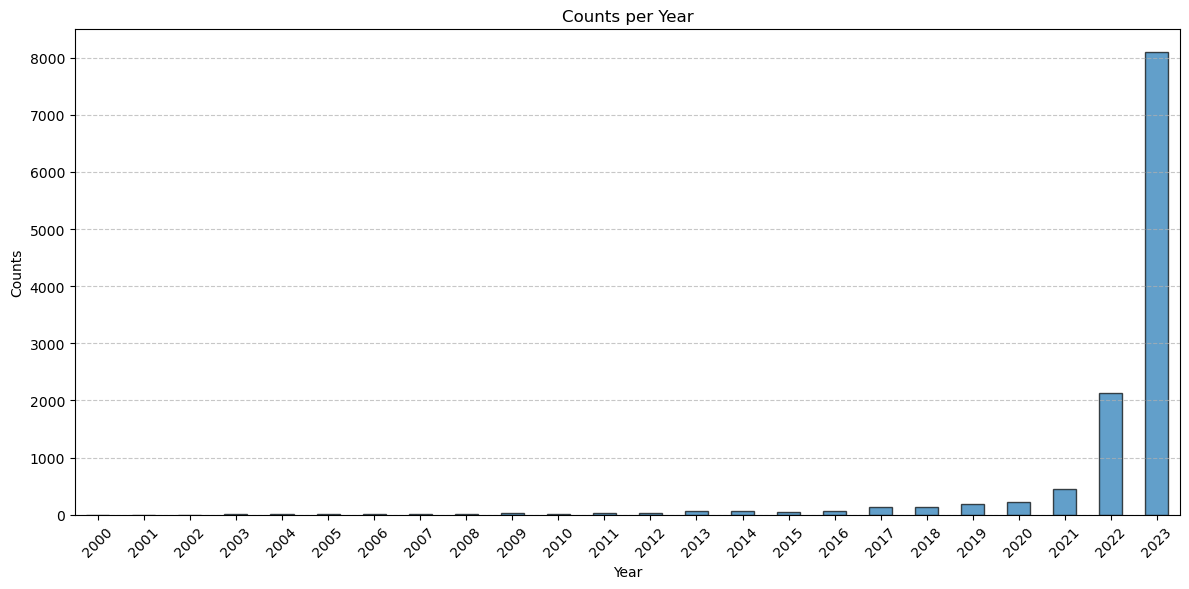

In [9]:
# Create a year column
df_articles['Year_published'] = df_articles['published_time'].dt.year
# Plot per year
plt.figure(figsize=(12, 6))
df_articles['Year_published'].value_counts().sort_index().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Counts per Year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Date Passed Since the last update of the article

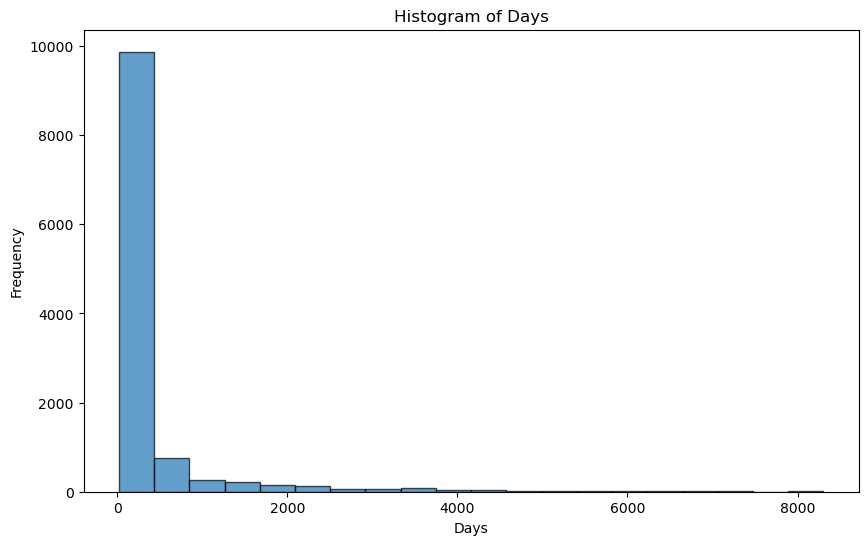

In [10]:
# Difference between the published time and the update time 
df_articles['Date_passed_since_last_update'] = df_articles['last_modified_time'] - df_articles['published_time']
# Days difference between updated and published
df_articles['days_passed_since_last_update'] = df_articles['Date_passed_since_last_update'].dt.days

# Creating a histogram
days_series = df_articles['days_passed_since_last_update']
plt.figure(figsize=(10, 6))
plt.hist(days_series, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show();

# Thought- Maybe is a good idea to drop old articles with no recent views and long update value

#### Premium Articles

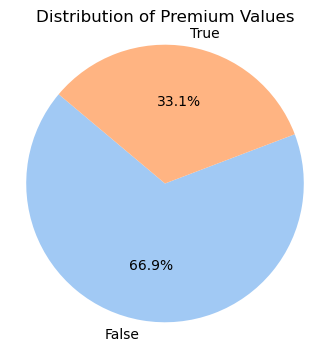

In [11]:
premium_counts = df_articles['premium'].value_counts()

# Create a pie chart
colors = sns.color_palette('pastel', len(premium_counts))
plt.figure(figsize=(4, 4))
plt.pie(premium_counts, labels=premium_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Distribution of Premium Values')
plt.axis('equal')  
plt.show()

#### Article Body

In [12]:
# In this one we can do more using NLP techinques. Since I do not know the language and this is just an EDA I will do basic staff
df_articles['body_length'] = df_articles['body'].apply(len)

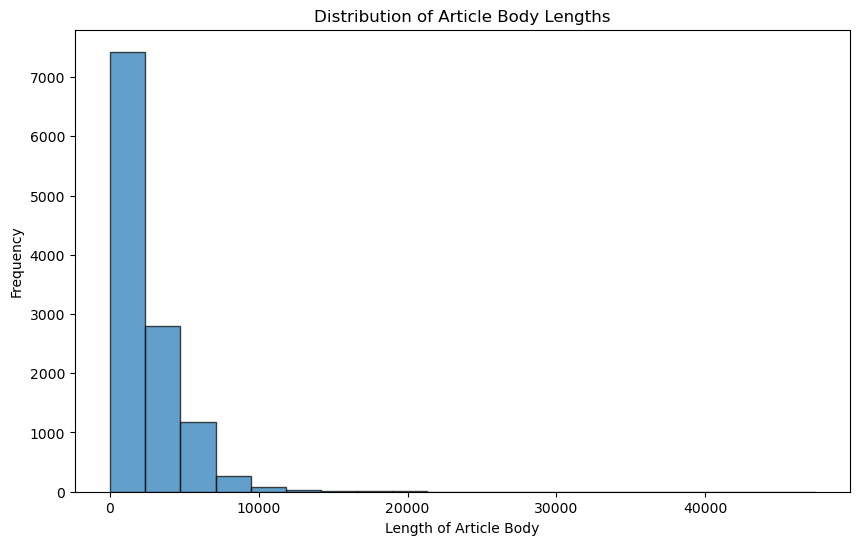

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df_articles['body_length'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Article Body Lengths')
plt.xlabel('Length of Article Body')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Statistics about the size of the characters in the articles 
df_articles['body_length'].describe()

count    11777.000000
mean      2456.512185
std       2141.952850
min          0.000000
25%       1213.000000
50%       1859.000000
75%       3246.000000
max      47355.000000
Name: body_length, dtype: float64

In [15]:
# Create a word count column
df_articles['word_count'] = df_articles['body'].apply(lambda x: len(x.split()))

In [16]:
# Statistics about the total words of the article
df_articles['word_count'].describe()

count    11777.000000
mean       414.329116
std        374.462965
min          0.000000
25%        201.000000
50%        305.000000
75%        548.000000
max       9178.000000
Name: word_count, dtype: float64

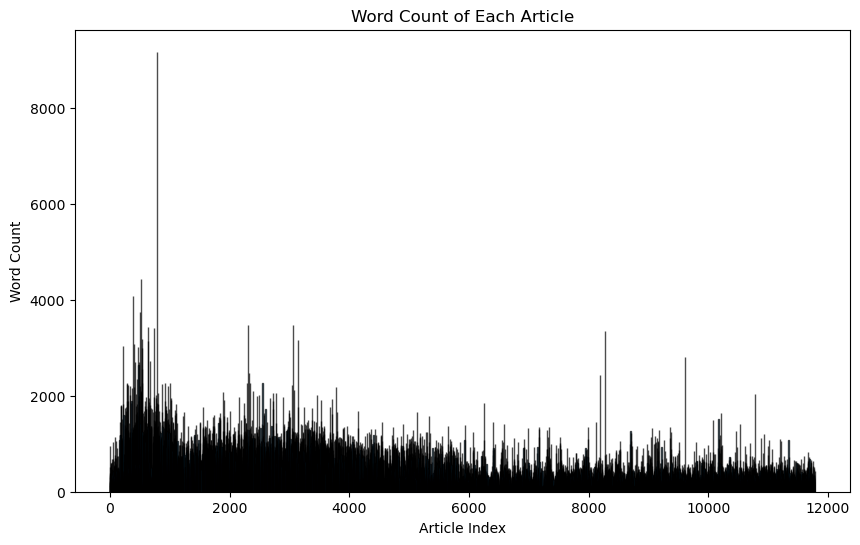

In [17]:
# Word Count of each article
plt.figure(figsize=(10, 6))
plt.bar(df_articles.index, df_articles['word_count'], edgecolor='k', alpha=0.7)
plt.title('Word Count of Each Article')
plt.xlabel('Article Index')
plt.ylabel('Word Count')
plt.show()

#### Image IDs

In [18]:
def count_items(lst):
    if lst is None or len(lst) == 0:
        return 0
    return len(lst)

# Apply the function to the column
df_articles['images_count'] = df_articles['image_ids'].apply(count_items)


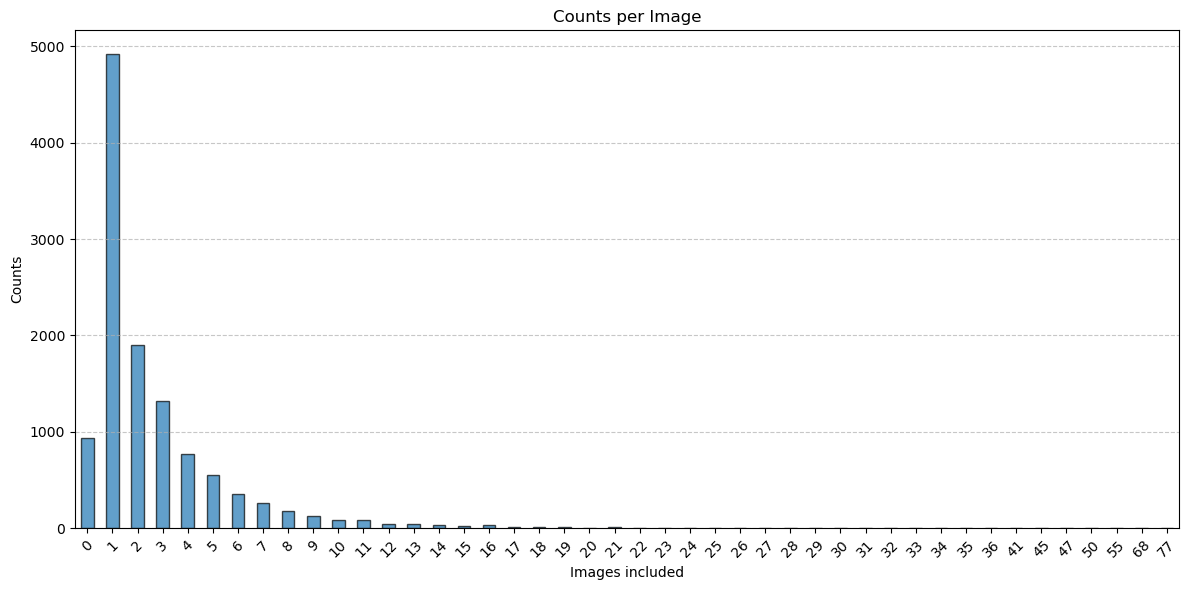

In [19]:
# Plot image ID
plt.figure(figsize=(12, 6))
df_articles['images_count'].value_counts().sort_index().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Counts per Image')
plt.xlabel('Images included')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Sentiment Label

In [20]:
df_articles['sentiment_label'].value_counts()

Negative    5004
Neutral     4793
Positive    1980
Name: sentiment_label, dtype: int64

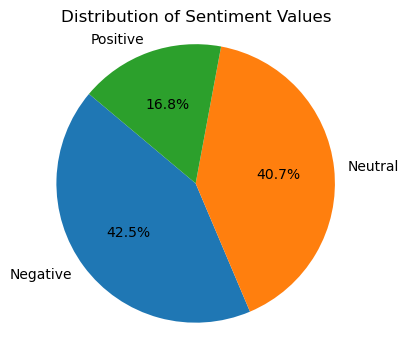

In [21]:
# Sentiment Label is a column created after NLP tasks. Due to the sentiment score we couldn't understand what technique-metric used
# We are going to just show the results
sentiment_counts  = df_articles['sentiment_label'].value_counts()

# Create a pie chart
#colors = sns.color_palette('pastel', len(premium_counts))
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Values')
plt.axis('equal')  
plt.show()

#### Topics

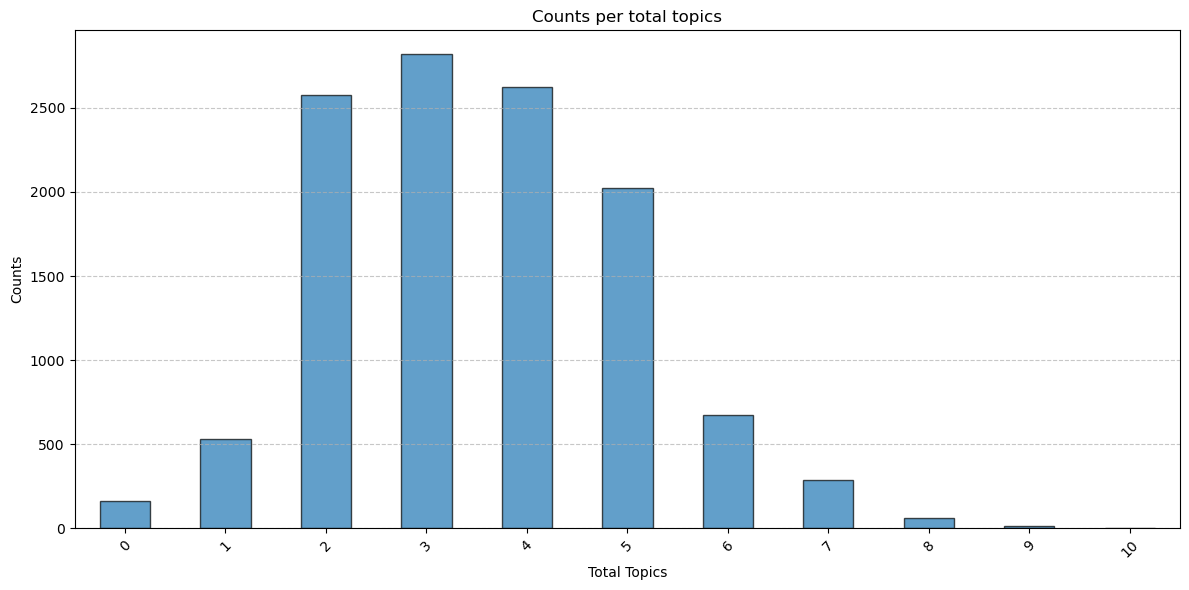

In [22]:
# Topics Count
df_articles['topics_count'] = df_articles['topics'].apply(count_items)

# Plot of total topics per article
plt.figure(figsize=(12, 6))
df_articles['topics_count'].value_counts().sort_index().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Counts per total topics')
plt.xlabel('Total Topics')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
topics = pd.DataFrame(df_articles['topics'])
topics = topics.explode('topics')
dummies = pd.get_dummies(topics['topics'])
df_binary = dummies.groupby(dummies.index).sum()
df_binary.shape[1] # Total categories

78

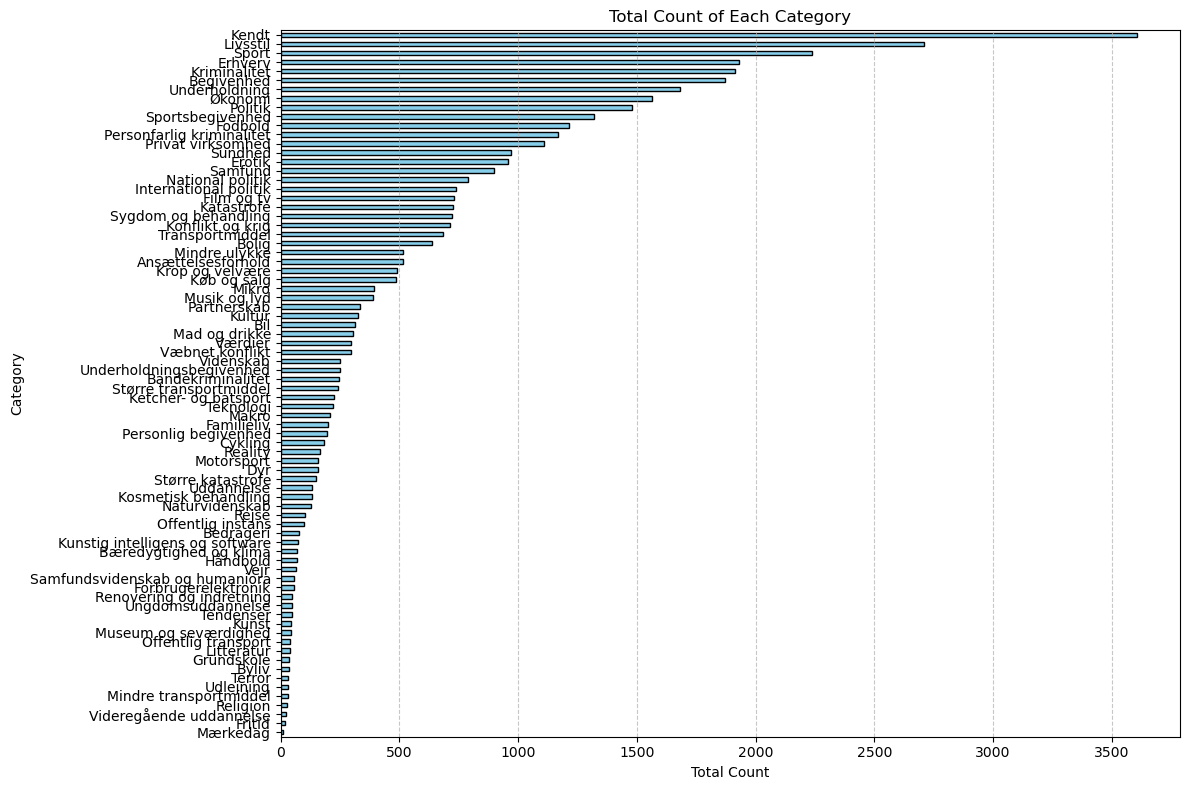

In [24]:
# Plot for each category
plt.figure(figsize=(12, 8))
df_binary.sum().sort_values().plot(kind='barh', color='skyblue', edgecolor='k')

plt.title('Total Count of Each Category')
plt.xlabel('Total Count')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#### Categories

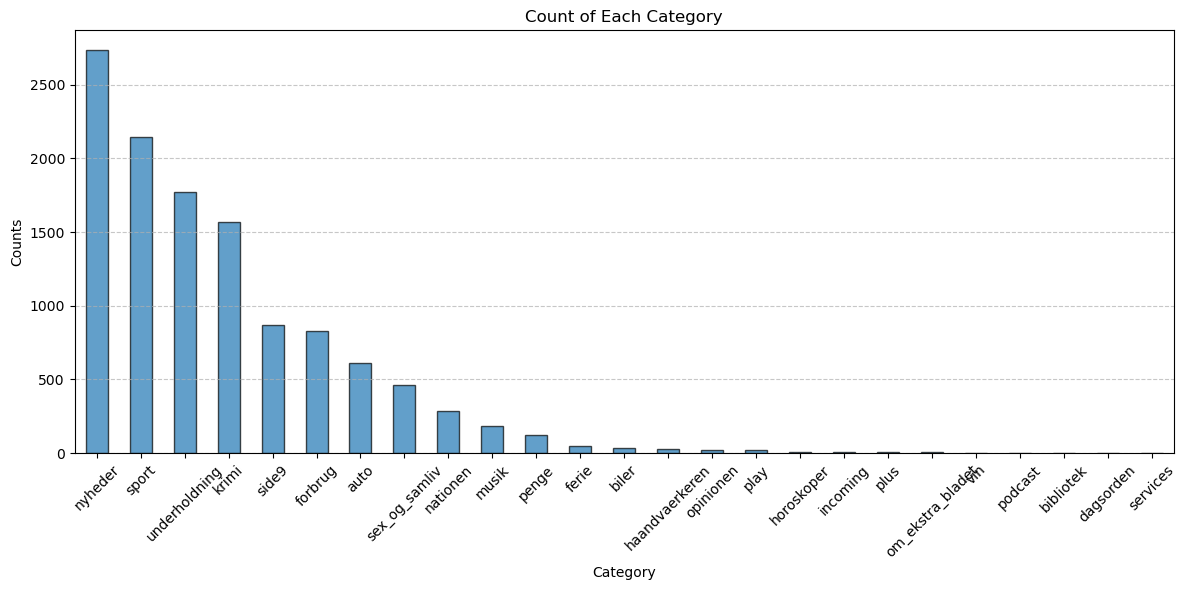

In [25]:
# Create a df with sorted values for each category
sorted_value_counts = df_articles['category_str'].value_counts().sort_values(ascending=False)

# Plot the sorted value counts
plt.figure(figsize=(12, 6))
sorted_value_counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Subcategories

In [26]:
# Create a DataFrame - subcategories
subcategories = pd.DataFrame(df_articles['subcategory'])
exploded = subcategories.explode('subcategory')
# Top 5 subcategories
top_5_subcategories = df['subcategory'].value_counts().head(5)

# Plot the top 5 subcategories
plt.figure(figsize=(10, 6))
top_5_subcategories.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Top 5 Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

#### Total inviews 

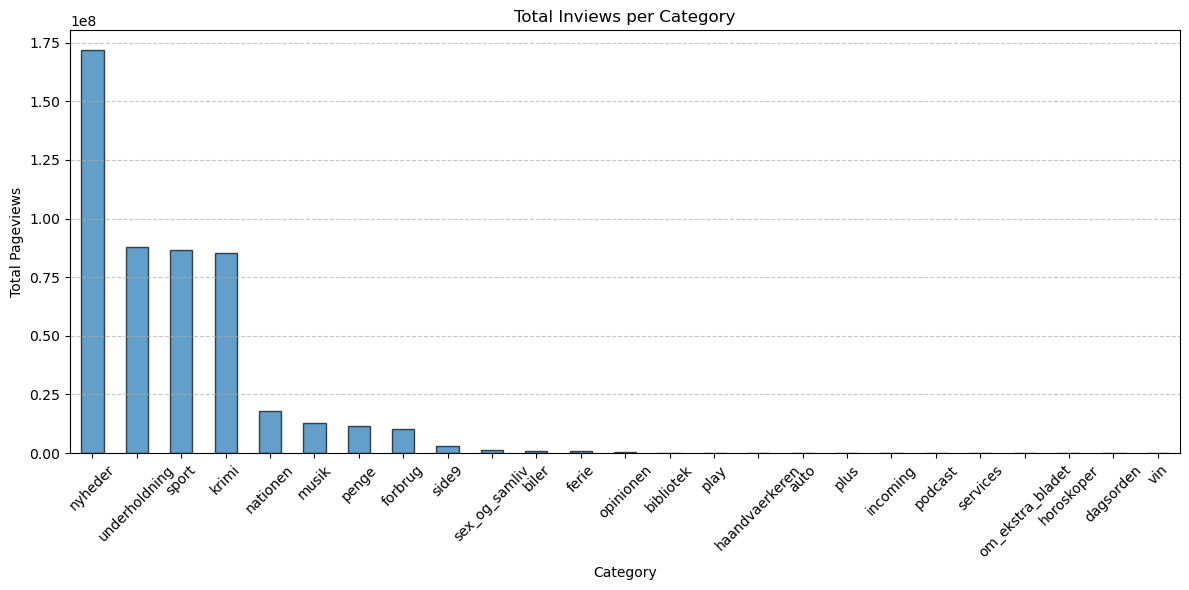

In [27]:
# Fill na
df_articles['total_inviews'] = df_articles['total_inviews'].fillna(0)
# Pageviews per category
category_pageviews = df_articles.groupby('category_str')['total_pageviews'].sum()

# Plot the resulting series
plt.figure(figsize=(12, 6))
category_pageviews.sort_values(ascending=False).plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Total Inviews per Category')
plt.xlabel('Category')
plt.ylabel('Total Pageviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Total pageviews

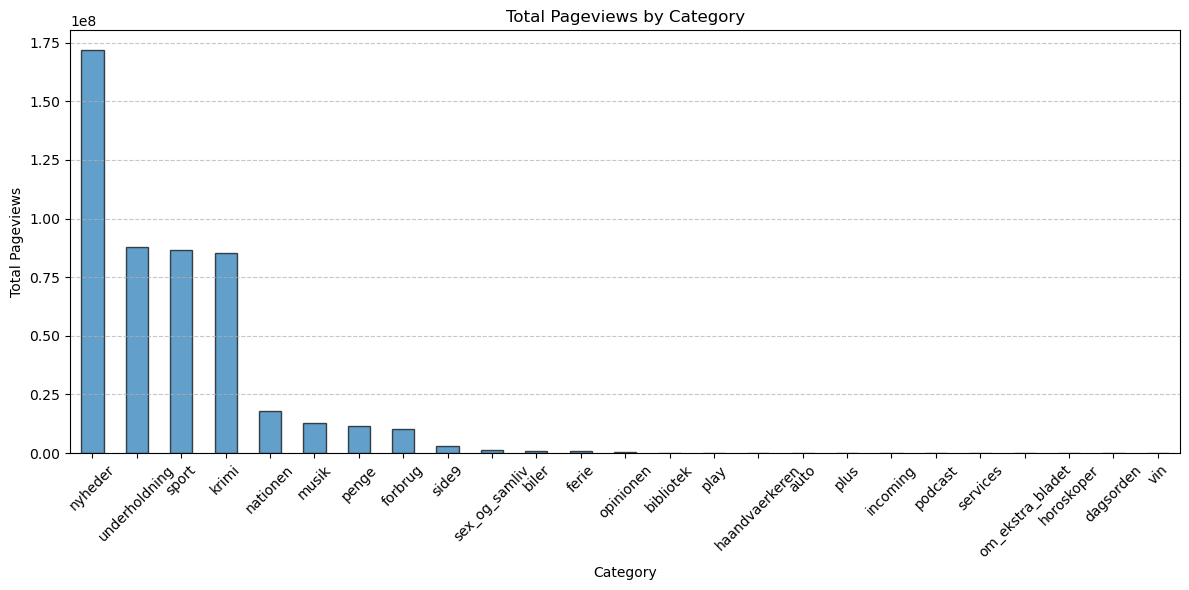

In [28]:
# Fill na
df_articles['total_pageviews'] = df_articles['total_pageviews'].fillna(0)
# Pageviews per category
category_pageviews = df_articles.groupby('category_str')['total_pageviews'].sum()

# Plot the resulting series
plt.figure(figsize=(12, 6))
category_pageviews.sort_values(ascending=False).plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Total Pageviews by Category')
plt.xlabel('Category')
plt.ylabel('Total Pageviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
df_articles[['total_inviews', 'total_pageviews' , 'total_read_time']]

,total_inviews,total_pageviews,total_read_time
0,0.0,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN
3,0.0,0.0,NaN
4,0.0,0.0,NaN
...,...,...,...
11772,535989.0,100120.0,4112624.0
11773,13320.0,959.0,55691.0
11774,315391.0,50361.0,2550671.0
11775,21318.0,1237.0,67514.0


#### Total Read Time

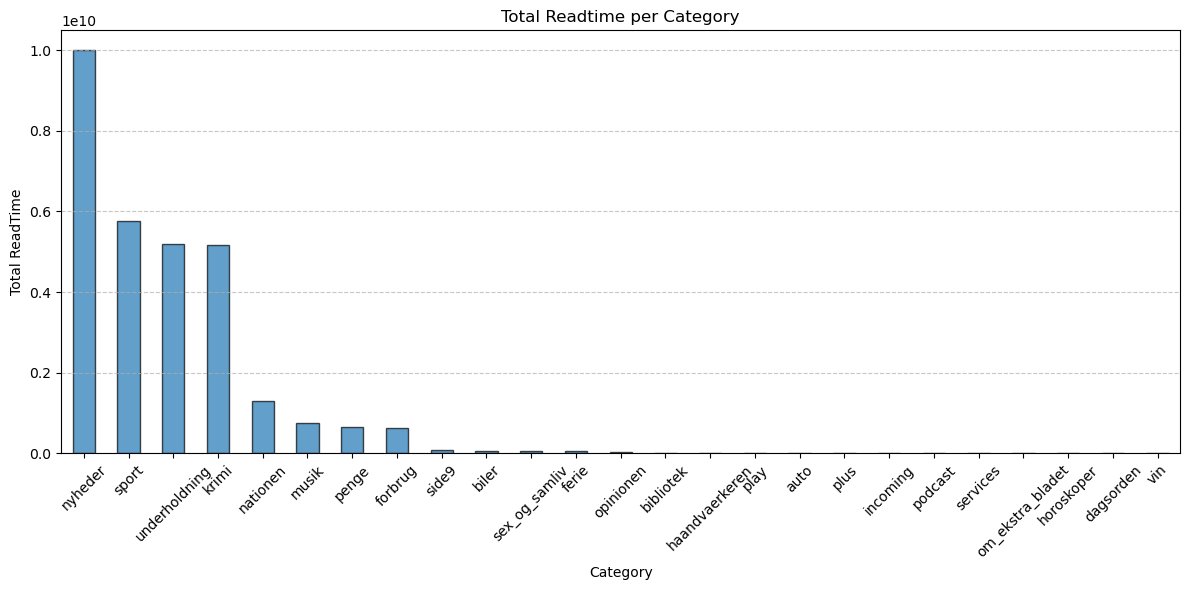

In [30]:
# Fill na
df_articles['total_read_time'] = df_articles['total_read_time'].fillna(0)
# Pageviews per category
category_readtime = df_articles.groupby('category_str')['total_read_time'].sum()

# Plot the resulting series
plt.figure(figsize=(12, 6))
category_readtime.sort_values(ascending=False).plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Total Readtime per Category')
plt.xlabel('Category')
plt.ylabel('Total ReadTime')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
# Columns with not much meaning value : article_type ,article_id , title , subtitle , subcategory 

## Behaviours

In [32]:
# Create a copy of my dataframe
df_behaviors_copy = df_behaviors.copy()

In [33]:
df_behaviors.head()

,impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage
0,48401,NaN,2023-05-21 21:06:50,21.0,NaN,2,"[9774516, 9771051, 9770028, 9775402, 9774461, ...",[9759966],22779,False,NaN,NaN,NaN,False,21,16.0,27.0
1,152513,9778745.0,2023-05-24 07:31:26,30.0,100.0,1,"[9778669, 9778736, 9778623, 9089120, 9778661, ...",[9778661],150224,False,NaN,NaN,NaN,False,298,2.0,48.0
2,155390,NaN,2023-05-24 07:30:33,45.0,NaN,1,"[9778369, 9777856, 9778500, 9778021, 9778627, ...",[9777856],160892,False,NaN,NaN,NaN,False,401,215.0,100.0
3,214679,NaN,2023-05-23 05:25:40,33.0,NaN,2,"[9776715, 9776406, 9776566, 9776071, 9776808, ...",[9776566],1001055,False,NaN,NaN,NaN,False,1357,40.0,47.0
4,214681,NaN,2023-05-23 05:31:54,21.0,NaN,2,"[9775202, 9776855, 9776688, 9771995, 9776583, ...",[9776553],1001055,False,NaN,NaN,NaN,False,1358,5.0,49.0


In [34]:
df_behaviors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24724 entries, 0 to 24723
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   impression_id           24724 non-null  uint32        
 1   article_id              7378 non-null   float64       
 2   impression_time         24724 non-null  datetime64[ns]
 3   read_time               24724 non-null  float32       
 4   scroll_percentage       7242 non-null   float32       
 5   device_type             24724 non-null  int8          
 6   article_ids_inview      24724 non-null  object        
 7   article_ids_clicked     24724 non-null  object        
 8   user_id                 24724 non-null  uint32        
 9   is_sso_user             24724 non-null  bool          
 10  gender                  1797 non-null   float64       
 11  postcode                361 non-null    float64       
 12  age                     617 non-null    float6

In [35]:
df_behaviors.shape

(24724, 17)

#### Missing Data

In [36]:
# Columns with missing values
null_columns = [col for col in df_behaviors.columns if df_behaviors[col].isnull().sum() != 0]
# Keep in mind that we have also null values in some categories that are not displaying as null due to their format. Example []
d_missing_values = {col: df_behaviors[col].isnull().sum() for col in df_behaviors.columns if df_behaviors[col].isnull().sum() != 0}
d_missing_values
# We can clearly see that there are some columns with many values missing

{'article_id': 17346,
 'scroll_percentage': 17482,
 'gender': 22927,
 'postcode': 24363,
 'age': 24107,
 'next_read_time': 673,
 'next_scroll_percentage': 2757}

#### Year of impression

In [2]:
### Month-hour-minute analysis -behaviour+ range -For all datasets train-validation

In [ ]:
# EDA per 

In [37]:
# Create a year column
df_behaviors['Year_published'] = df_behaviors['impression_time'].dt.year
# Plot per year
pd.DataFrame(df_behaviors['Year_published'].value_counts())

,Year_published
2023,24724


####  Read Time

#### Subscriber- Boolean

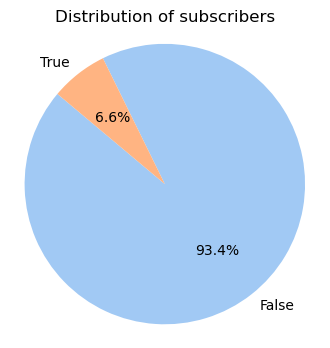

In [38]:
subscribers = df_behaviors['is_subscriber'].value_counts()

# Create a pie chart
colors = sns.color_palette('pastel', len(premium_counts))
plt.figure(figsize=(4, 4))
plt.pie(subscribers, labels=subscribers.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Distribution of subscribers')
plt.axis('equal')  
plt.show()

#### Device type 

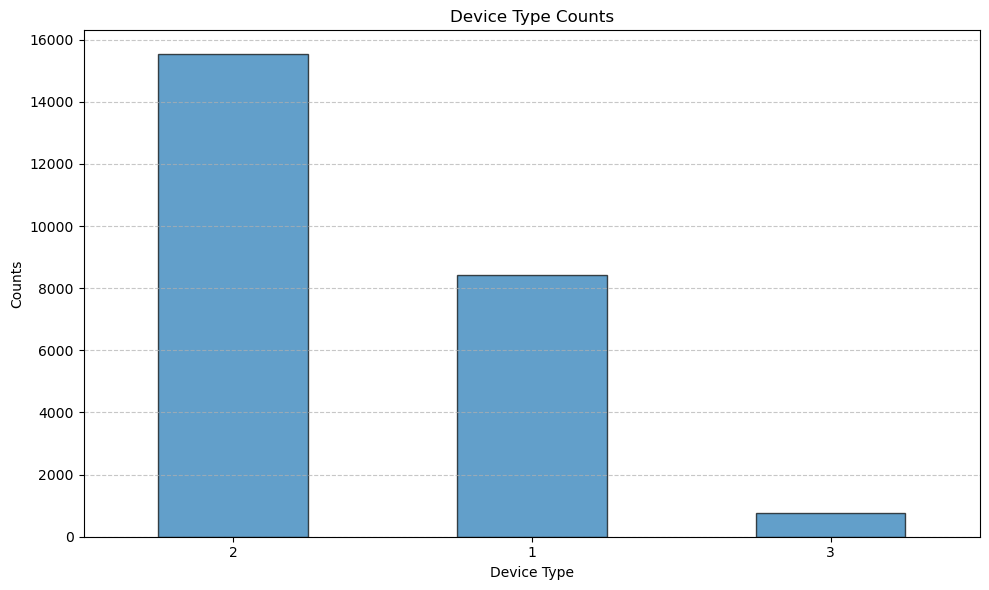

In [39]:
device_type_counts = df_behaviors['device_type'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
device_type_counts.plot(kind='bar', color='#1f77b4', edgecolor='k', alpha=0.7)
plt.title('Device Type Counts')
plt.xlabel('Device Type')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Next scroll time per user 

In [41]:
stats_next_read_time_per_user = pd.DataFrame(df_behaviors.groupby('user_id').describe()['next_read_time'])
stats_next_read_time_per_user

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
11313,8.0,212.250000,295.931824,0.0,4.75,6.5,463.0,708.0
13538,12.0,12.916667,14.829077,0.0,3.50,6.0,18.5,50.0
15430,3.0,9.666667,10.785793,2.0,3.50,5.0,13.5,22.0
19181,19.0,97.368423,252.232971,1.0,4.00,21.0,64.0,1114.0
19568,2.0,371.000000,520.430603,3.0,187.00,371.0,555.0,739.0
...,...,...,...,...,...,...,...,...
2581162,21.0,95.142860,165.551270,0.0,13.00,39.0,95.0,718.0
2583035,32.0,50.593750,63.333141,0.0,8.50,28.0,73.5,321.0
2583477,13.0,121.153847,146.997070,0.0,0.00,0.0,237.0,370.0


#### next_scroll_percentage

In [40]:
df_behaviors['next_scroll_percentage'].fillna(0,inplace=True)
stats_next_scroll_per_user = pd.DataFrame(df_behaviors.groupby('user_id').describe()['next_scroll_percentage'])
stats_next_scroll_per_user

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
11313,8.0,62.500000,30.910007,0.0,55.50,63.5,78.25,100.0
13538,12.0,36.666668,34.877274,0.0,6.75,32.5,50.25,100.0
15430,3.0,61.000000,38.509739,23.0,41.50,60.0,80.00,100.0
19181,19.0,47.157894,29.208567,0.0,29.00,40.0,65.00,100.0
19568,2.0,71.000000,41.012192,42.0,56.50,71.0,85.50,100.0
...,...,...,...,...,...,...,...,...
2581162,24.0,63.541668,44.379765,0.0,12.75,98.5,100.00,100.0
2583035,34.0,54.735294,44.422432,0.0,10.50,61.5,100.00,100.0
2583477,13.0,38.923077,48.746731,0.0,0.00,0.0,100.00,100.0


#### User-Article

In [42]:
df_users_articles = df_behaviors[['user_id','article_ids_inview']]
df_users_articles.set_index('user_id', inplace=True)
df_users_articles = df_users_articles.explode('article_ids_inview')
dummies = pd.get_dummies(df_users_articles['article_ids_inview'])
df_sparse = dummies.groupby(dummies.index).sum()

C:\Users\giwrg\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [43]:
df_sparse.head()

4721905  5345489  5986757  6141159  6141222  6480189  6640267  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        0        0        0        0        0        0   
15430          0        0        0        0        0        0        0   
19181          0        0        0        0        0        0        0   
19568          0        0        0        0        0        0        0   

         6741781  6842758  6959633  6965775  6965802  7148020  7184889  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        0        0        0        0        0        0   
15430          0        0        0        0        0        0        0   
19181          0        0        0        0        0        0        0   
19568          0        0        0        0        0        0        0   

         7194596  7213923  7295320  7300605  7306652  7310404  7355930  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        1        0        0        0        0        0   
15430          0        0        0        0        1        0        0   
19181          0        2        0        0        0        0        0   
19568          0        0        0        0        0        0        0   

         7377747  7420751  7454944  7458377  7460419  7462621  7512369  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        1        0        0        0        0        0   
15430          0        0        0        0        0        0        0   
19181          0        0        0        0        0        0        0   
19568          0        0        0        0        0        0        0   

         7516793  7594265  7629829  7695717  7723736  7841609  7851321  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        0        0        0        0        0        0   
15430          0        0        0        0        0        0        0   
19181          0        0        0        0        0        0        0   
19568          0        0        0        0        0        0        0   

         7865155  7988280  8002737  8004871  8054212  8067106  8089512  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        0        0        0        0        0        0   
15430          0        0        0        0        0        0        0   
19181          0        0        0        0        0        0        0   
19568          0        0        0        0        0        0        0   

         8169191  8203711  8209974  8219851  8220538  8227546  8315213  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        0        0        0        0        0        0   
15430          0        0        0        0        0        0        0   
19181          0        0        0        0        0        0        0   
19568          0        0        0        0        0        0        0   

         8390911  8396520  8397583  8409068  8418229  8420438  8422665  \
user_id                                                                  
11313          0        0        0        0        0        0        0   
13538          0        0        0        0        0        0        0   
15430          0        0        0        0        0        0        0   
19181 

## History

In [44]:
# Create a copy of dataframe
df_history_copy = df_history.copy()

In [45]:
df_history.head()

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed
0,13538,"[2023-04-27T10:17:43.000000, 2023-04-27T10:18:...","[100.0, 35.0, 100.0, 24.0, 100.0, 23.0, 100.0,...","[9738663, 9738569, 9738663, 9738490, 9738663, ...","[17.0, 12.0, 4.0, 5.0, 4.0, 9.0, 5.0, 46.0, 11..."
1,58608,"[2023-04-27T18:48:09.000000, 2023-04-27T18:48:...","[37.0, 61.0, 100.0, 100.0, 55.0, 100.0, 100.0,...","[9739362, 9739179, 9738567, 9739344, 9739202, ...","[2.0, 24.0, 72.0, 65.0, 11.0, 4.0, 101.0, 0.0,..."
2,95507,"[2023-04-27T15:20:28.000000, 2023-04-27T15:20:...","[60.0, 100.0, 100.0, 21.0, 29.0, 67.0, 49.0, 5...","[9739035, 9738646, 9634967, 9738902, 9735495, ...","[18.0, 29.0, 51.0, 12.0, 10.0, 10.0, 13.0, 24...."
3,106588,"[2023-04-27T08:29:09.000000, 2023-04-27T08:29:...","[24.0, 57.0, 100.0, nan, nan, 100.0, 100.0, 73...","[9738292, 9738216, 9737266, 9737556, 9737657, ...","[9.0, 15.0, 42.0, 9.0, 3.0, 58.0, 26.0, 214.0,..."
4,617963,"[2023-04-27T14:42:25.000000, 2023-04-27T14:43:...","[100.0, 100.0, nan, 46.0, 23.0, 19.0, 61.0, 70...","[9739035, 9739088, 9738902, 9738968, 9738760, ...","[45.0, 29.0, 116.0, 26.0, 34.0, 42.0, 58.0, 59..."


In [46]:
df_history_1 = df_history_copy.copy()

In [47]:
def count_items(lst):
    if lst is None or len(lst) == 0:
        return 0
    return len(lst)

# Apply the function to the column
df_history['impression_time_fixed_count'] = df_history['impression_time_fixed'].apply(count_items)
df_history['scroll_percentage_fixed_count'] = df_history['scroll_percentage_fixed'].apply(count_items)
df_history['article_id_fixed_count'] = df_history['article_id_fixed'].apply(count_items)
df_history['read_time_fixed_count'] = df_history['read_time_fixed'].apply(count_items)
df_history

,user_id,impression_time_fixed,scroll_percentage_fixed,article_id_fixed,read_time_fixed,impression_time_fixed_count,scroll_percentage_fixed_count,article_id_fixed_count,read_time_fixed_count
0,13538,"[2023-04-27T10:17:43.000000, 2023-04-27T10:18:...","[100.0, 35.0, 100.0, 24.0, 100.0, 23.0, 100.0,...","[9738663, 9738569, 9738663, 9738490, 9738663, ...","[17.0, 12.0, 4.0, 5.0, 4.0, 9.0, 5.0, 46.0, 11...",582,582,582,582
1,58608,"[2023-04-27T18:48:09.000000, 2023-04-27T18:48:...","[37.0, 61.0, 100.0, 100.0, 55.0, 100.0, 100.0,...","[9739362, 9739179, 9738567, 9739344, 9739202, ...","[2.0, 24.0, 72.0, 65.0, 11.0, 4.0, 101.0, 0.0,...",151,151,151,151
2,95507,"[2023-04-27T15:20:28.000000, 2023-04-27T15:20:...","[60.0, 100.0, 100.0, 21.0, 29.0, 67.0, 49.0, 5...","[9739035, 9738646, 9634967, 9738902, 9735495, ...","[18.0, 29.0, 51.0, 12.0, 10.0, 10.0, 13.0, 24....",370,370,370,370
3,106588,"[2023-04-27T08:29:09.000000, 2023-04-27T08:29:...","[24.0, 57.0, 100.0, nan, nan, 100.0, 100.0, 73...","[9738292, 9738216, 9737266, 9737556, 9737657, ...","[9.0, 15.0, 42.0, 9.0, 3.0, 58.0, 26.0, 214.0,...",149,149,149,149
4,617963,"[2023-04-27T14:42:25.000000, 2023-04-27T14:43:...","[100.0, 100.0, nan, 46.0, 23.0, 19.0, 61.0, 70...","[9739035, 9739088, 9738902, 9738968, 9738760, ...","[45.0, 29.0, 116.0, 26.0, 34.0, 42.0, 58.0, 59...",277,277,277,277
...,...,...,...,...,...,...,...,...,...
1585,1122370,"[2023-05-09T06:50:19.000000, 2023-05-09T06:51:...","[100.0, 100.0, 100.0, 100.0, nan]","[9755181, 9706958, 9709329, 9706958, 9755571]","[84.0, 115.0, 298.0, 5.0, 79.0]",5,5,5,5
1586,1718049,"[2023-05-17T05:04:36.000000, 2023-05-17T05:04:...","[53.0, 100.0, 24.0, 100.0, 83.0, 28.0, 37.0, 4...","[9768583, 9728166, 9768829, 9769641, 9769994, ...","[13.0, 17.0, 7.0, 99.0, 5.0, 8.0, 4.0, 2.0, 4.0]",9,9,9,9
1587,1178033,"[2023-04-29T19:36:47.000000, 2023-04-29T19:37:...","[nan, 98.0, 92.0, 30.0, 35.0, 9.0, 34.0, 58.0,...","[9742268, 9742423, 9742270, 9742440, 9742459, ...","[10.0, 74.0, 89.0, 10.0, 1.0, 4.0, 11.0, 7.0, ...",9,9,9,9
1588,395912,"[2023-05-12T05:12:34.000000, 2023-05-12T05:12:...","[100.0, 100.0, 100.0, 33.0, nan]","[9760741, 9760998, 9760935, 9754442, 9760935]","[16.0, 22.0, 23.0, 9.0, 0.0]",5,5,5,5


In [48]:
df_exploded = df_history.explode(['impression_time_fixed','scroll_percentage_fixed', 'article_id_fixed','read_time_fixed'])
df_exploded = df_exploded[['user_id','impression_time_fixed','scroll_percentage_fixed','article_id_fixed','read_time_fixed']]

In [49]:
df_exploded['impression_time_fixed_month'] = df_exploded['impression_time_fixed'].dt.month

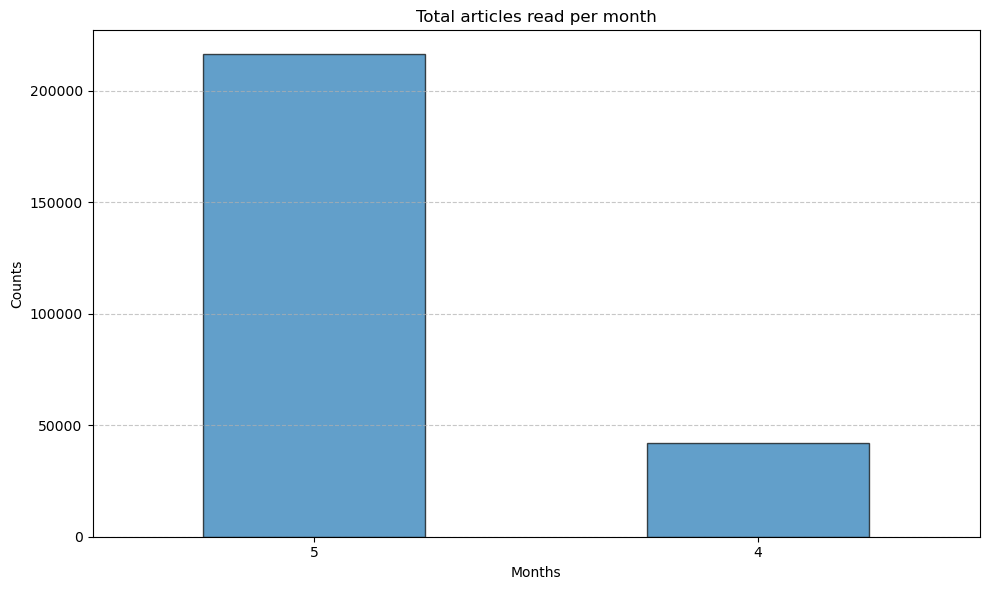

In [50]:
df_exploded['impression_time_fixed_month'].value_counts()
impression_time_fixed_month = df_exploded['impression_time_fixed_month'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
impression_time_fixed_month.plot(kind='bar', color='#1f77b4', edgecolor='k', alpha=0.7)
plt.title('Total articles read per month')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
df_exploded.fillna(0,inplace=True)

In [52]:
df_exploded.groupby("user_id").mean()

,scroll_percentage_fixed,article_id_fixed,read_time_fixed,impression_time_fixed_month
user_id,,,,
11313,75.400000,9.747673e+06,153.425003,4.900000
13538,36.288660,9.745253e+06,12.357388,4.829897
15430,71.071429,9.756652e+06,47.571430,5.000000
19181,45.400000,9.749882e+06,53.963078,4.756923
19568,73.103448,9.750792e+06,60.517242,4.793103
...,...,...,...,...
2581162,75.344961,9.749257e+06,41.034885,4.930233
2583035,55.743363,9.743813e+06,58.150444,5.000000
2583477,49.005988,9.738382e+06,124.000000,4.772455


## Merged Df

#### Find if we can merge behaviours and history in one table

In [ ]:
behaviours_columns =list(df_behaviors.columns)
history_columns = list(df_history.columns)

In [ ]:
# The only shared column between those tables is the user id column
lista = []
for col in behaviours_columns:
    if col in history_columns:
        lista.append(col)
lista

In [ ]:
behaviours_user_id = list(df_behaviors['user_id'].values)
history_user_id = list(df_history['user_id'].values)

In [ ]:
df_behaviors.shape

In [ ]:
df_history.shape

In [ ]:
# So every 
lista = []
for col in history_user_id:
    if col in behaviours_user_id:
        lista.append(col)
len(lista)

In [ ]:
merged_df = pd.merge(df_behaviors, df_history_1, on='user_id', how='inner')

In [ ]:
merged_df.head()